## HENG Seaklong 
## e20210329

## 1. Statistical Inference in Linear Regression

Before interpreting any model, we must ensure the relationships it captures are statistically significant. We will use statsmodels to obtain detailed statistical summaries (p-values) for our coefficients.

### A. Import Dataset

For more information about the dataset at [Abalone of UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/abalone).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### Load the dataset

In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
column_names = ["Type", "Length", "Diameter", "Height", "Whole_weight", 
                "Shucked_weight", "Viscera_weight", "Shell_weight", "Rings"]

df = pd.read_csv(url, names=column_names)
df.head()

,Type,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### B. EDA and Data Preprocessing:

#### Dataset dimensions and variable types

In [3]:
# Dataset dimension
print(f"Dataset shape: {df.shape}")
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print(f"\nVariable types:")
print(df.dtypes)
print(f"\nQuantitative variables: {df.select_dtypes(include=[np.number]).shape[1]}")
print(f"Qualitative variables: {df.select_dtypes(include=['object']).shape[1]}")
print(f"\nQualitative variables: {list(df.select_dtypes(include=['object']).columns)}")
print(f"Quantitative variables: {list(df.select_dtypes(include=[np.number]).columns)}")

Dataset shape: (4177, 9)
Number of samples: 4177
Number of features: 9

Variable types:
Type               object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

Quantitative variables: 8
Qualitative variables: 1

Qualitative variables: ['Type']
Quantitative variables: ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']


In [4]:
# Detailed dataset information
print("Dataset Information:")
print(df.info())
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None

Missing values:
Type              0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

Total missing values: 0


In [5]:
# Drop the categorical variable 'Type' for simplicity (can be encoded if needed)
print(f"Original shape: {df.shape}")
print(f"Unique values in 'Type': {df['Type'].unique()}")
df.drop(columns=['Type'], inplace=True)
print(f"Shape after dropping 'Type': {df.shape}")

Original shape: (4177, 9)
Unique values in 'Type': ['M' 'F' 'I']
Shape after dropping 'Type': (4177, 8)


#### Statistical summary and distribution visualization

In [6]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


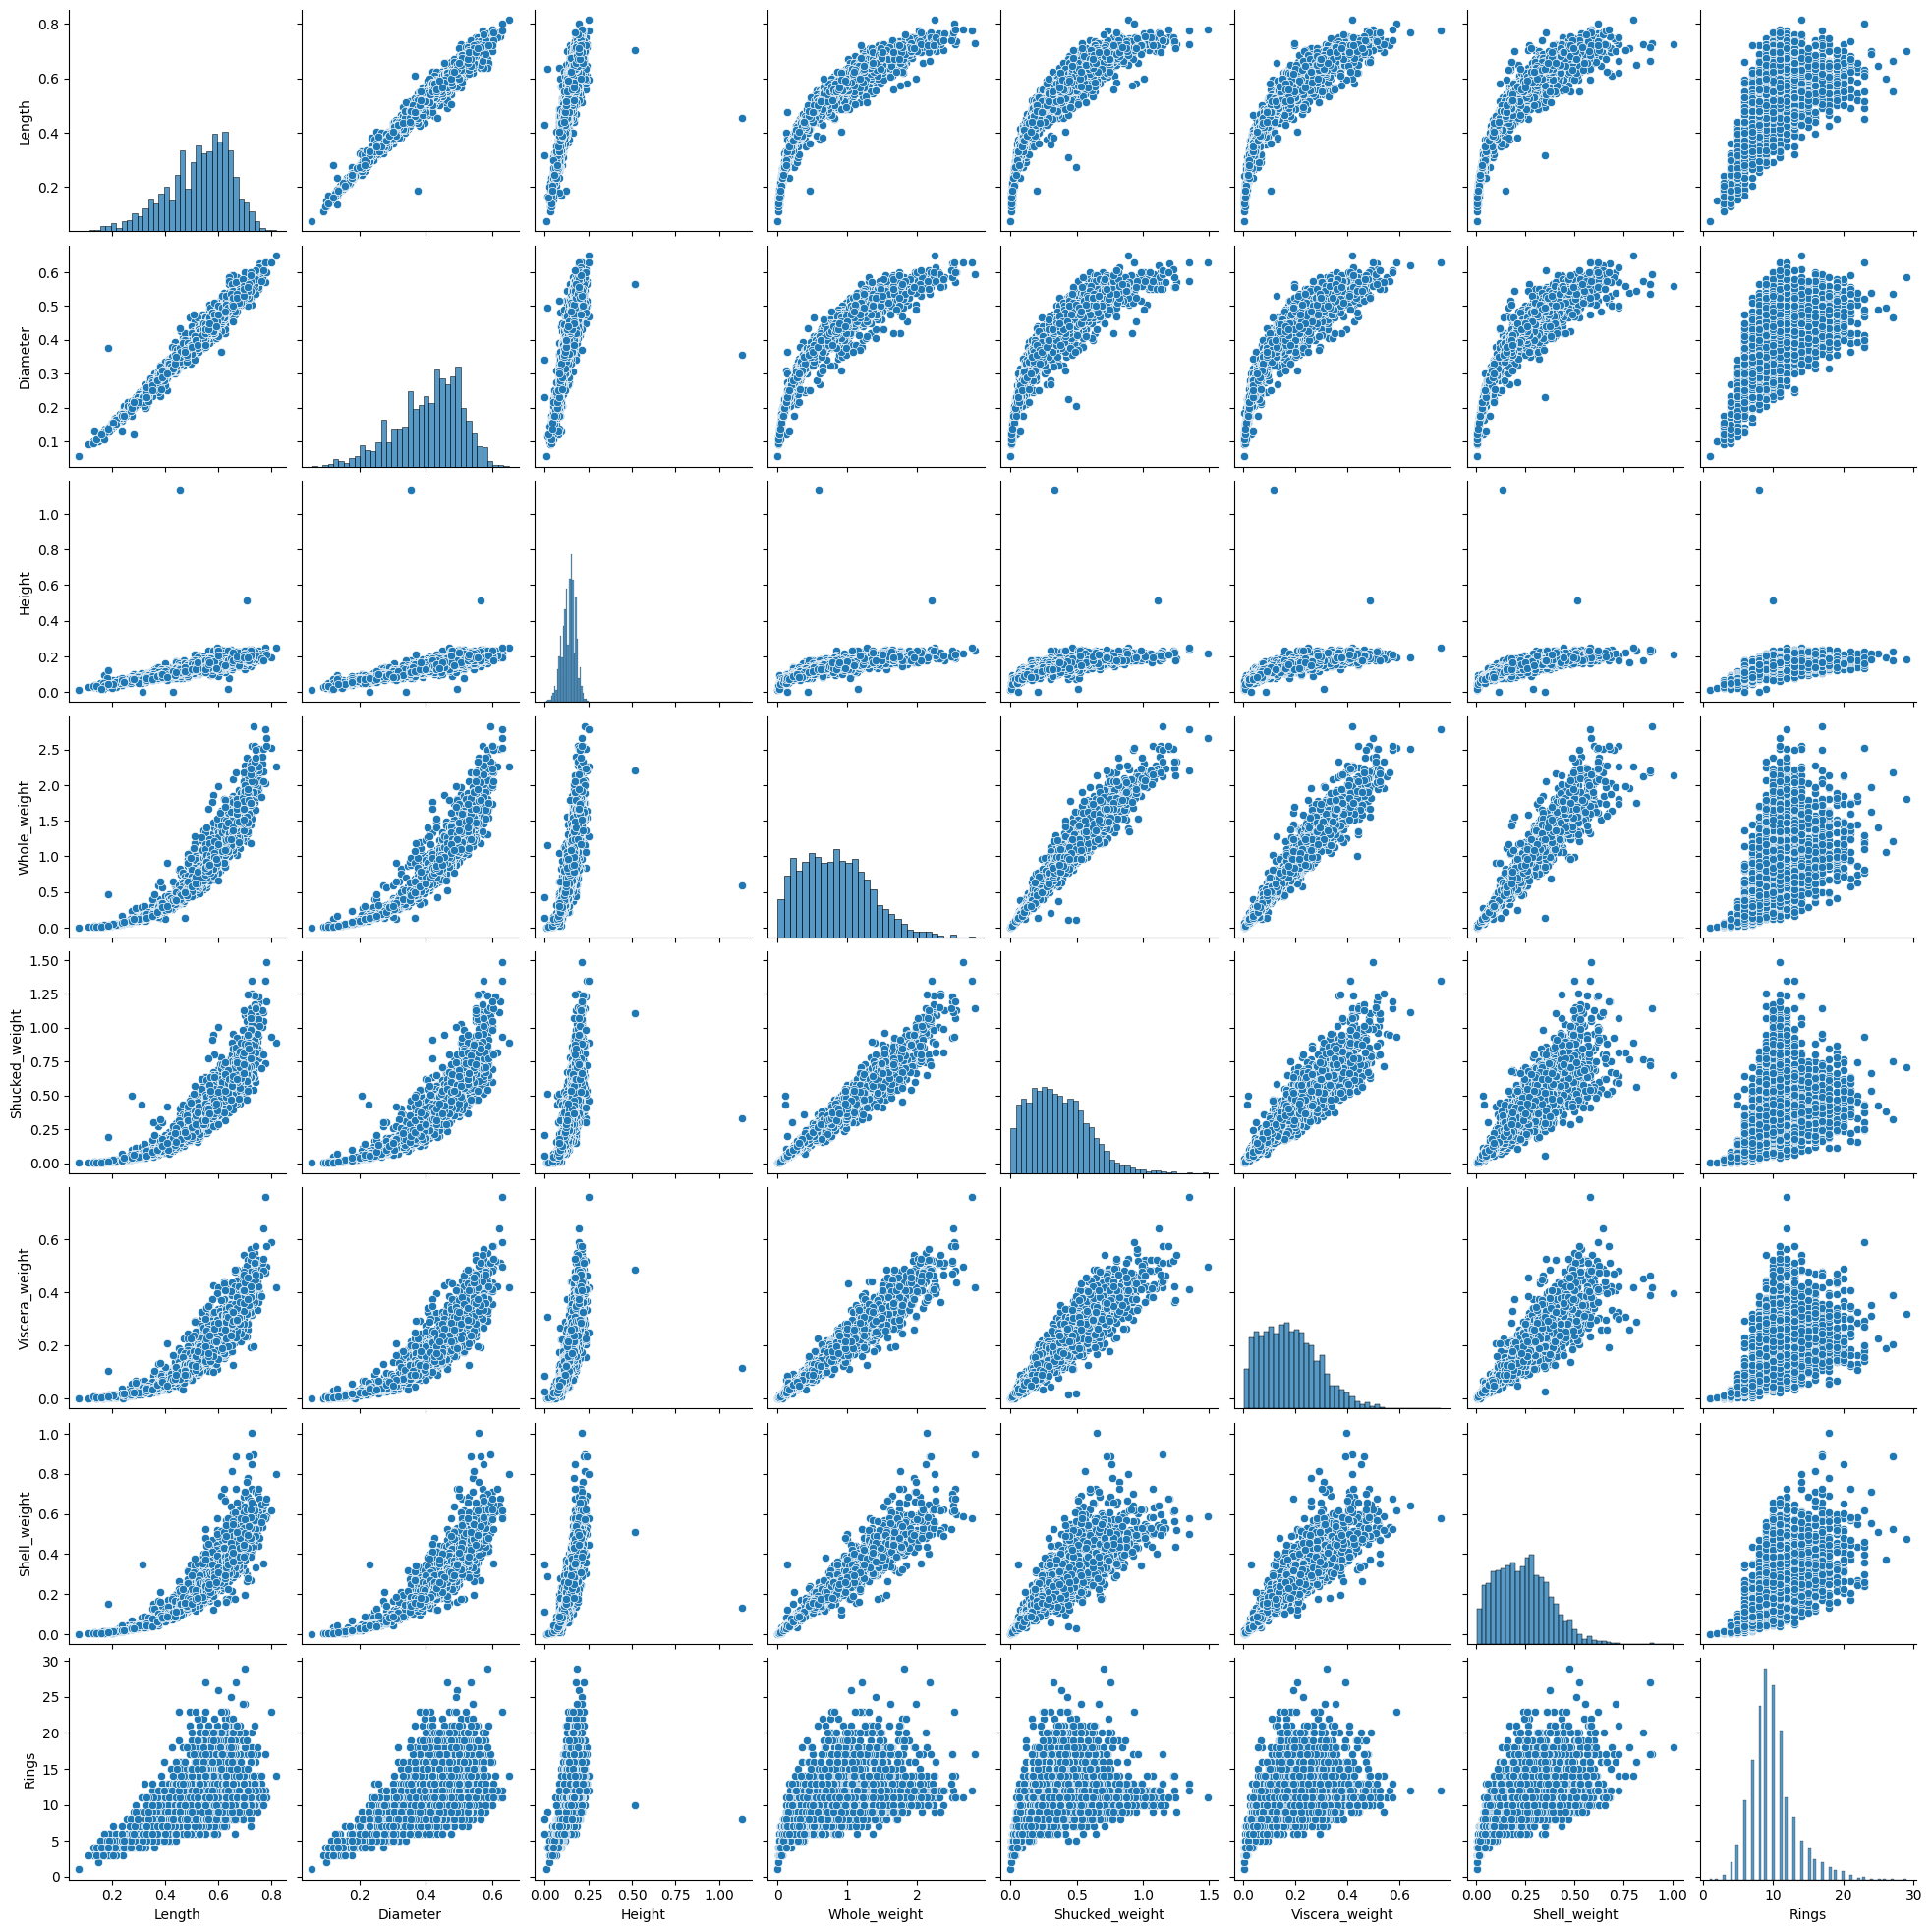

In [ ]:
# Visualize distributions and relationships
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairplot of Abalone Dataset', y=1.01)
plt.show()

#### Correlation matrix analysis

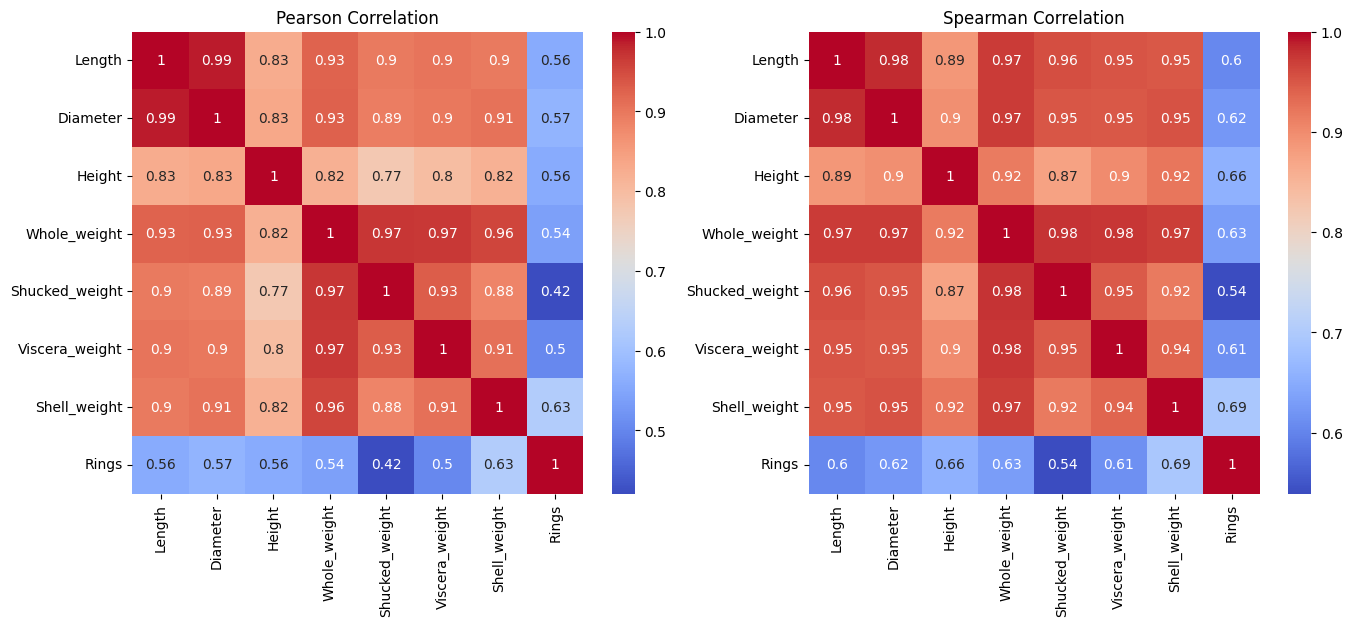

In [7]:
df.select_dtypes(include=[np.number]).corr('pearson')
df.select_dtypes(include=[np.number]).corr('spearman')

# plot heatmap for 2 correlation methods in one figure
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr('pearson'), annot=True, cmap='coolwarm', ax=ax[0])
ax[0].set_title('Pearson Correlation')
sns.heatmap(df.select_dtypes(include=[np.number]).corr('spearman'), annot=True, cmap='coolwarm', ax=ax[1])
ax[1].set_title('Spearman Correlation')
plt.show()


**Correlation Matrix Interpretation:**

- **High correlations** between physical dimensions (Length, Diameter, Height) and weights (Whole_weight, Shucked_weight, Viscera_weight, Shell_weight) are expected as larger abalones are heavier
- **Target variable (Rings)** shows moderate positive correlation with all features
- **Multicollinearity** is present: Length, Diameter strongly correlated (>0.9)
- **Shell_weight** shows strongest correlation with Rings (~0.63), making it a good predictor
- Both Pearson and Spearman correlations are similar, suggesting linear relationships

### C. Simple and Multiple Linear Regression (OLS)

#### 1. Simple Linear Regression (Shell_weight → Rings)

In [8]:
# Select Shell_weight as it has the highest correlation with Rings
X_slr = df[['Shell_weight']]
y = df['Rings']

# Split the dataset into training (80%) and testing (20%) sets
X_train_slr, X_test_slr, y_train, y_test = train_test_split(X_slr, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train_slr.shape[0]}")
print(f"Testing set size: {X_test_slr.shape[0]}")

Training set size: 3341
Testing set size: 836


In [9]:
# Fit Simple Linear Regression using statsmodels for statistical testing
model_slr = sm.OLS(y_train, sm.add_constant(X_train_slr)).fit()
print(model_slr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     2152.
Date:                Sun, 14 Dec 2025   Prob (F-statistic):               0.00
Time:                        11:58:01   Log-Likelihood:                -7803.0
No. Observations:                3341   AIC:                         1.561e+04
Df Residuals:                    3339   BIC:                         1.562e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.5058      0.086     75.787   

In [10]:
# Evaluate Simple Linear Regression on test set
y_pred_slr = model_slr.predict(sm.add_constant(X_test_slr))

r2_slr = r2_score(y_test, y_pred_slr)
mse_slr = mean_squared_error(y_test, y_pred_slr)
rmse_slr = np.sqrt(mse_slr)

print("=== Simple Linear Regression Performance ===")
print(f"R² Score: {r2_slr:.4f}")
print(f"MSE: {mse_slr:.4f}")
print(f"RMSE: {rmse_slr:.4f}")

=== Simple Linear Regression Performance ===
R² Score: 0.4009
MSE: 6.4859
RMSE: 2.5467


#### 2. Multiple Linear Regression (All Features → Rings)

In [11]:
# Select all features for multiple linear regression
X_mlr = df.drop(columns=['Rings'])
y = df['Rings']

# Split the dataset
X_train_mlr, X_test_mlr, y_train, y_test = train_test_split(X_mlr, y, test_size=0.2, random_state=42)

print(f"Features used: {list(X_mlr.columns)}")
print(f"Number of features: {X_mlr.shape[1]}")

Features used: ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']
Number of features: 7


In [12]:
# Fit Multiple Linear Regression using statsmodels
model_mlr = sm.OLS(y_train, sm.add_constant(X_train_mlr)).fit()
print(model_mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     528.4
Date:                Sun, 14 Dec 2025   Prob (F-statistic):               0.00
Time:                        11:58:12   Log-Likelihood:                -7386.7
No. Observations:                3341   AIC:                         1.479e+04
Df Residuals:                    3333   BIC:                         1.484e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.9868      0.306      9.

In [13]:
# Evaluate Multiple Linear Regression on test set
y_pred_mlr = model_mlr.predict(sm.add_constant(X_test_mlr))

r2_mlr = r2_score(y_test, y_pred_mlr)
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
rmse_mlr = np.sqrt(mse_mlr)

print("=== Multiple Linear Regression Performance ===")
print(f"R² Score: {r2_mlr:.4f}")
print(f"MSE: {mse_mlr:.4f}")
print(f"RMSE: {rmse_mlr:.4f}")

print("\n=== Model Comparison ===")
print(f"Simple LR  - R²: {r2_slr:.4f}, RMSE: {rmse_slr:.4f}")
print(f"Multiple LR - R²: {r2_mlr:.4f}, RMSE: {rmse_mlr:.4f}")
print(f"\nImprovement: {(r2_mlr - r2_slr)/r2_slr * 100:.2f}% increase in R²")

=== Multiple Linear Regression Performance ===
R² Score: 0.5330
MSE: 5.0555
RMSE: 2.2485

=== Model Comparison ===
Simple LR  - R²: 0.4009, RMSE: 2.5467
Multiple LR - R²: 0.5330, RMSE: 2.2485

Improvement: 32.96% increase in R²


### D. Interpretation & Significance Testing

**Hypothesis Testing for Coefficients:**
- **Null Hypothesis (H₀)**: Coefficient = 0 (feature has no effect)
- **Alternative Hypothesis (H₁)**: Coefficient ≠ 0 (feature has significant effect)
- **Decision Rule**: If p-value < 0.05, reject H₀ (feature is significant)

In [14]:
# Analyze statistical significance from Multiple Linear Regression
print("="*80)
print("STATISTICAL SIGNIFICANCE ANALYSIS - Multiple Linear Regression")
print("="*80)

# Extract p-values and coefficients
params = model_mlr.params
pvalues = model_mlr.pvalues
conf_int = model_mlr.conf_int()

# Create a summary dataframe
significance_df = pd.DataFrame({
    'Feature': params.index,
    'Coefficient': params.values,
    'P-value': pvalues.values,
    'Significant (p<0.05)': pvalues.values < 0.05,
    '95% CI Lower': conf_int[0].values,
    '95% CI Upper': conf_int[1].values
})

print("\n", significance_df.to_string(index=False))

# Identify significant and insignificant features
significant_features = significance_df[
    (significance_df['Significant (p<0.05)'] == True) & 
    (significance_df['Feature'] != 'const')
]['Feature'].tolist()

insignificant_features = significance_df[
    (significance_df['Significant (p<0.05)'] == False) & 
    (significance_df['Feature'] != 'const')
]['Feature'].tolist()

print("\n" + "="*80)
print(f"SIGNIFICANT features (p < 0.05): {significant_features}")
print(f"INSIGNIFICANT features (p >= 0.05): {insignificant_features}")
print("="*80)

STATISTICAL SIGNIFICANCE ANALYSIS - Multiple Linear Regression

        Feature  Coefficient      P-value  Significant (p<0.05)  95% CI Lower  95% CI Upper
         const     2.986805 3.213277e-22                  True      2.386971      3.586639
        Length    -1.521104 4.672297e-01                 False     -5.622997      2.580788
      Diameter    13.480159 1.313149e-07                  True      8.482424     18.477893
        Height    11.399510 2.728846e-12                  True      8.214401     14.584619
  Whole_weight     9.154485 1.864615e-25                  True      7.447258     10.861711
Shucked_weight   -20.580206 2.619050e-93                  True    -22.487638    -18.672775
Viscera_weight    -8.852471 2.352024e-09                  True    -11.751133     -5.953808
  Shell_weight     8.641625 6.668695e-11                  True      6.054582     11.228668

SIGNIFICANT features (p < 0.05): ['Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_

**Observations from P-values:**

Analyze the `P>|t|` column in the summary to determine which features contribute significantly to predicting Rings.

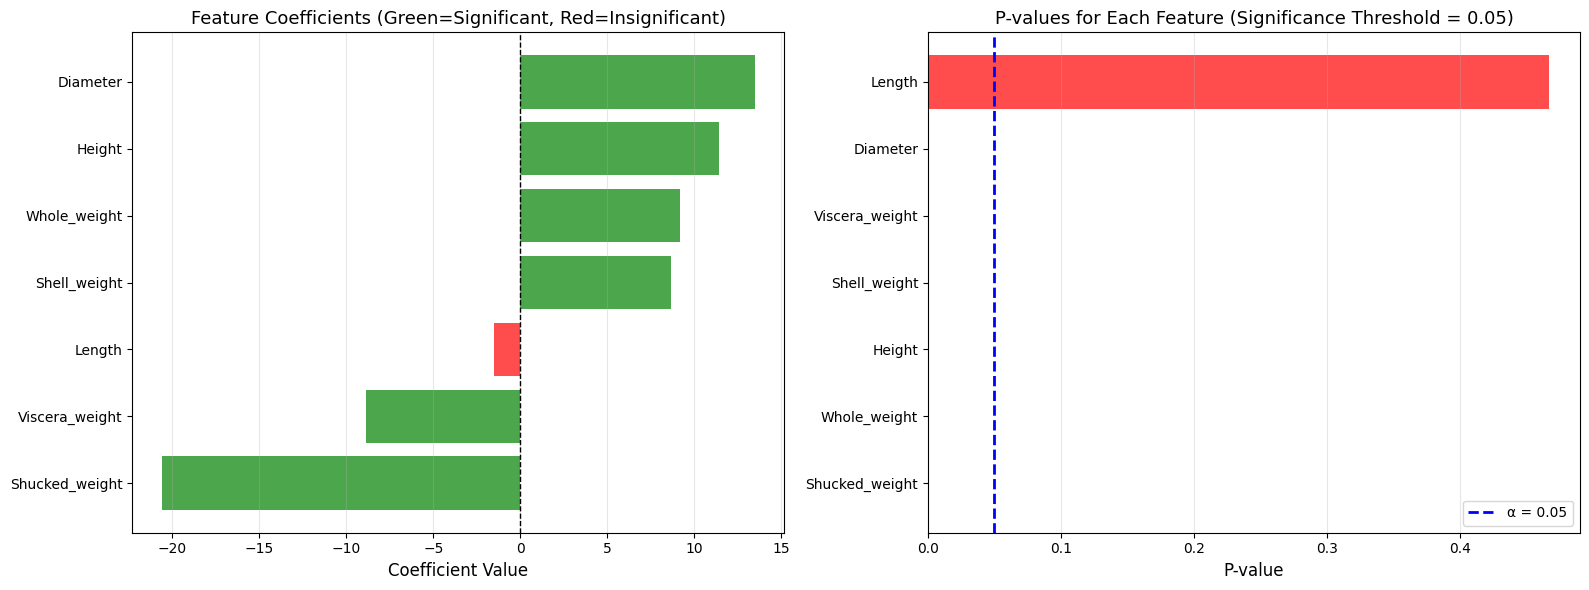

In [15]:
# Visualize coefficient significance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Coefficients with confidence intervals
ax1 = axes[0]
features_plot = significance_df[significance_df['Feature'] != 'const'].copy()
features_plot = features_plot.sort_values('Coefficient')

colors = ['green' if sig else 'red' for sig in features_plot['Significant (p<0.05)']]
y_pos = np.arange(len(features_plot))

ax1.barh(y_pos, features_plot['Coefficient'], color=colors, alpha=0.7)
ax1.set_yticks(y_pos)
ax1.set_yticklabels(features_plot['Feature'])
ax1.set_xlabel('Coefficient Value', fontsize=12)
ax1.set_title('Feature Coefficients (Green=Significant, Red=Insignificant)', fontsize=13)
ax1.axvline(0, color='black', linestyle='--', linewidth=1)
ax1.grid(True, alpha=0.3, axis='x')

# Plot 2: P-values
ax2 = axes[1]
features_pval = significance_df[significance_df['Feature'] != 'const'].copy()
features_pval = features_pval.sort_values('P-value')

colors_pval = ['green' if p < 0.05 else 'red' for p in features_pval['P-value']]
y_pos2 = np.arange(len(features_pval))

ax2.barh(y_pos2, features_pval['P-value'], color=colors_pval, alpha=0.7)
ax2.set_yticks(y_pos2)
ax2.set_yticklabels(features_pval['Feature'])
ax2.set_xlabel('P-value', fontsize=12)
ax2.set_title('P-values for Each Feature (Significance Threshold = 0.05)', fontsize=13)
ax2.axvline(0.05, color='blue', linestyle='--', linewidth=2, label='α = 0.05')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

#### Refinement: Dropping Insignificant Features

If any features appear insignificant (p ≥ 0.05), we can try refitting the model without them.

In [16]:
# Refit model with only significant features (if any insignificant ones exist)
if len(insignificant_features) > 0:
    print(f"Refitting model WITHOUT insignificant features: {insignificant_features}")
    
    # Select only significant features
    X_refined = df[significant_features]
    y = df['Rings']
    
    # Split data
    X_train_refined, X_test_refined, y_train, y_test = train_test_split(
        X_refined, y, test_size=0.2, random_state=42
    )
    
    # Fit refined model
    model_refined = sm.OLS(y_train, sm.add_constant(X_train_refined)).fit()
    print("\n" + "="*80)
    print("REFINED MODEL (Only Significant Features)")
    print("="*80)
    print(model_refined.summary())
    
    # Evaluate refined model
    y_pred_refined = model_refined.predict(sm.add_constant(X_test_refined))
    r2_refined = r2_score(y_test, y_pred_refined)
    rmse_refined = np.sqrt(mean_squared_error(y_test, y_pred_refined))
    
    print("\n" + "="*80)
    print("MODEL COMPARISON")
    print("="*80)
    print(f"{'Model':<30} {'R² Score':<12} {'RMSE':<12} {'# Features':<12}")
    print("-"*80)
    print(f"{'Simple LR (Shell_weight)':<30} {r2_slr:<12.4f} {rmse_slr:<12.4f} {1:<12}")
    print(f"{'Multiple LR (All features)':<30} {r2_mlr:<12.4f} {rmse_mlr:<12.4f} {X_mlr.shape[1]:<12}")
    print(f"{'Refined LR (Significant)':<30} {r2_refined:<12.4f} {rmse_refined:<12.4f} {len(significant_features):<12}")
    print("="*80)
else:
    print("All features are statistically significant (p < 0.05)!")
    print("No refinement needed.")

Refitting model WITHOUT insignificant features: ['Length']

REFINED MODEL (Only Significant Features)
                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     616.5
Date:                Sun, 14 Dec 2025   Prob (F-statistic):               0.00
Time:                        11:58:52   Log-Likelihood:                -7387.0
No. Observations:                3341   AIC:                         1.479e+04
Df Residuals:                    3334   BIC:                         1.483e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

#### Key Interpretations

**From Statistical Testing:**
1. **P-value < 0.05**: Feature has statistically significant relationship with target
2. **Coefficient sign**: Positive = increases Rings, Negative = decreases Rings
3. **Multicollinearity**: High correlations between predictors can inflate p-values
4. **Model refinement**: Removing insignificant features can improve interpretability without sacrificing much performance

**Expected Results:**
- Shell_weight, Shucked_weight, Whole_weight likely significant (direct relationship with size/age)
- Some physical dimensions may be redundant due to multicollinearity
- Height might be less significant (smaller correlation with Rings)

---

## 2. Polynomial Features (Complexity)

Simple linear models assume a straight-line relationship. However, biological growth is often non-linear. We will introduce Polynomial Features to capture interaction terms and curvature.

### A. Creating Interaction Terms

Use PolynomialFeatures to generate a new feature set.

In [18]:
# Prepare data for polynomial features (use all features like MLR)
X = df.drop(columns=['Rings'])
y = df['Rings']

# Split the dataset (reusing same random_state for consistency)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Features for polynomial transformation: {list(X.columns)}")
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

Features for polynomial transformation: ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']
Training set: (3341, 7)
Testing set: (836, 7)


In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create polynomial features with degree 2 (includes interaction terms)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(f"Original feature count: {X_train.shape[1]}")
print(f"Polynomial feature count: {X_train_poly.shape[1]}")
print(f"\nFeature names (first 20):")
feature_names = poly.get_feature_names_out(X_train.columns)
for i, name in enumerate(feature_names[:20]):
    print(f"{i+1}. {name}")

Original feature count: 7
Polynomial feature count: 35

Feature names (first 20):
1. Length
2. Diameter
3. Height
4. Whole_weight
5. Shucked_weight
6. Viscera_weight
7. Shell_weight
8. Length^2
9. Length Diameter
10. Length Height
11. Length Whole_weight
12. Length Shucked_weight
13. Length Viscera_weight
14. Length Shell_weight
15. Diameter^2
16. Diameter Height
17. Diameter Whole_weight
18. Diameter Shucked_weight
19. Diameter Viscera_weight
20. Diameter Shell_weight


### B. The Danger of Overfitting

Fit a standard Linear Regression model on these new polynomial features. Notice the magnitude of the coefficients.

In [20]:
# Fit Linear Regression on polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

# Make predictions
y_train_pred = lr_poly.predict(X_train_poly)
y_test_pred = lr_poly.predict(X_test_poly)

# Evaluate performance
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("=== Linear Regression with Polynomial Features (degree=2) ===")
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")
print(f"\n=== Coefficient Magnitudes ===")
print(f"Max coefficient: {np.max(np.abs(lr_poly.coef_)):.2f}")
print(f"Min coefficient: {np.min(np.abs(lr_poly.coef_[lr_poly.coef_ != 0])):.2f}")
print(f"Mean |coefficient|: {np.mean(np.abs(lr_poly.coef_)):.2f}")
print(f"\nLargest coefficients:")
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lr_poly.coef_})
print(coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(10))

=== Linear Regression with Polynomial Features (degree=2) ===
Training R²: 0.5810
Testing R²: 0.5367
Training MSE: 4.3092
Testing MSE: 5.0156

=== Coefficient Magnitudes ===
Max coefficient: 150.56
Min coefficient: 2.51
Mean |coefficient|: 45.95

Largest coefficients:
                    Feature  Coefficient
23    Height Viscera_weight  -150.562733
19    Diameter Shell_weight  -137.734074
11    Length Shucked_weight   120.573270
12    Length Viscera_weight  -103.252116
18  Diameter Viscera_weight    92.188423
17  Diameter Shucked_weight   -83.493606
16    Diameter Whole_weight    79.965539
15          Diameter Height   -67.032362
13      Length Shell_weight    66.827492
22    Height Shucked_weight   -63.569140


**Interpretation:** Notice the large coefficient magnitudes and potential overfitting (high training R² vs test R²). Polynomial features increase model complexity but may lead to unstable predictions.

## 3. Regularization (Ridge & Lasso)

High-degree polynomials can lead to exploding coefficients. We use Regularization to constrain the model, trading a little bias for significantly reduced variance.

### A. Ridge Regression (L2 Penalty)

Use a Pipeline to ensure data is Scaled before Regularization (crucial for Ridge/Lasso). We use RidgeCV to automatically find the best alpha.

In [21]:
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline with scaling and Ridge regression
alphas = np.logspace(-2, 4, 100)  # Test alpha values from 0.01 to 10000
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', RidgeCV(alphas=alphas, cv=5))
])

# Fit the pipeline on polynomial features
ridge_pipeline.fit(X_train_poly, y_train)

# Get the best alpha
best_alpha = ridge_pipeline.named_steps['ridge'].alpha_
print(f"Best alpha (Ridge): {best_alpha:.4f}")

# Make predictions
y_train_pred_ridge = ridge_pipeline.predict(X_train_poly)
y_test_pred_ridge = ridge_pipeline.predict(X_test_poly)

# Evaluate performance
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)
train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)

print("\n=== Ridge Regression Performance ===")
print(f"Training R²: {train_r2_ridge:.4f}")
print(f"Testing R²: {test_r2_ridge:.4f}")
print(f"Training MSE: {train_mse_ridge:.4f}")
print(f"Testing MSE: {test_mse_ridge:.4f}")

# Compare coefficient magnitudes
ridge_coefs = ridge_pipeline.named_steps['ridge'].coef_
print(f"\n=== Ridge Coefficient Magnitudes ===")
print(f"Max coefficient: {np.max(np.abs(ridge_coefs)):.2f}")
print(f"Mean |coefficient|: {np.mean(np.abs(ridge_coefs)):.2f}")
print(f"\n=== Comparison: Linear Regression vs Ridge ===")
print(f"Linear Reg - Max |coef|: {np.max(np.abs(lr_poly.coef_)):.2f}")
print(f"Ridge      - Max |coef|: {np.max(np.abs(ridge_coefs)):.2f}")
print(f"Reduction: {(1 - np.max(np.abs(ridge_coefs))/np.max(np.abs(lr_poly.coef_)))*100:.1f}%")

Best alpha (Ridge): 28.4804

=== Ridge Regression Performance ===
Training R²: 0.5574
Testing R²: 0.5498
Training MSE: 4.5517
Testing MSE: 4.8740

=== Ridge Coefficient Magnitudes ===
Max coefficient: 2.28
Mean |coefficient|: 0.65

=== Comparison: Linear Regression vs Ridge ===
Linear Reg - Max |coef|: 150.56
Ridge      - Max |coef|: 2.28
Reduction: 98.5%


**Interpretation:** Ridge regression shrinks coefficients significantly, reducing overfitting. The test R² should be closer to the training R², indicating better generalization.

### B. Visualizing the Regularization Path (Ridge)

This plot visualizes how increasing the regularization strength (α) shrinks the coefficients towards zero, reducing model complexity.

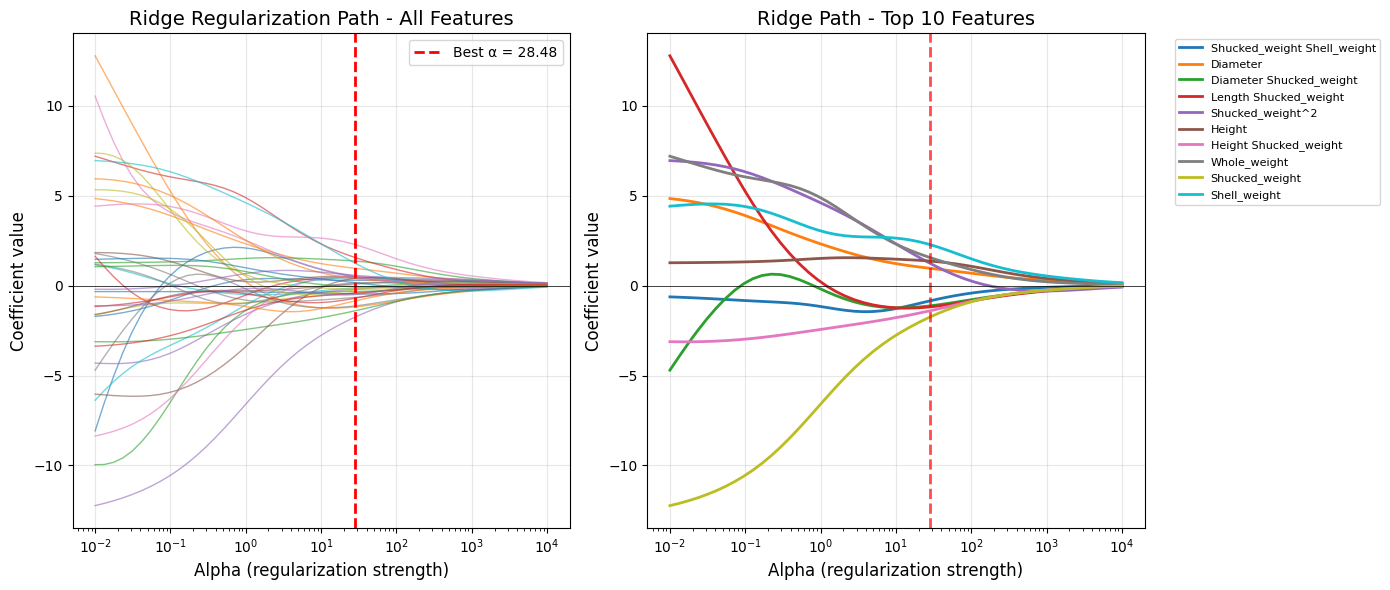

In [22]:
# Compute Ridge coefficients for different alpha values
alphas_path = np.logspace(-2, 4, 50)
coefs_ridge = []

# Scale the data first
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)

for alpha in alphas_path:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_poly_scaled, y_train)
    coefs_ridge.append(ridge.coef_)

coefs_ridge = np.array(coefs_ridge)

# Plot the regularization path
plt.figure(figsize=(14, 6))

# Plot 1: All coefficients
plt.subplot(1, 2, 1)
for i in range(coefs_ridge.shape[1]):
    plt.plot(alphas_path, coefs_ridge[:, i], alpha=0.6, linewidth=1)
plt.xscale('log')
plt.xlabel('Alpha (regularization strength)', fontsize=12)
plt.ylabel('Coefficient value', fontsize=12)
plt.title('Ridge Regularization Path - All Features', fontsize=14)
plt.axvline(best_alpha, color='red', linestyle='--', linewidth=2, label=f'Best α = {best_alpha:.2f}')
plt.axhline(0, color='black', linestyle='-', linewidth=0.5)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Top 10 features by magnitude
plt.subplot(1, 2, 2)
top_indices = np.argsort(np.abs(ridge_coefs))[-10:]
for i in top_indices:
    plt.plot(alphas_path, coefs_ridge[:, i], label=feature_names[i], linewidth=2)
plt.xscale('log')
plt.xlabel('Alpha (regularization strength)', fontsize=12)
plt.ylabel('Coefficient value', fontsize=12)
plt.title('Ridge Path - Top 10 Features', fontsize=14)
plt.axvline(best_alpha, color='red', linestyle='--', linewidth=2, alpha=0.7)
plt.axhline(0, color='black', linestyle='-', linewidth=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Interpretation:** As α increases, all coefficients shrink toward zero (but never exactly zero with Ridge). The red line shows the optimal α from cross-validation. Higher α = more regularization = simpler model.

### C. Lasso Feature Selection

Unlike Ridge, Lasso can drive coefficients exactly to zero, effectively performing feature selection. Build polynomial of a chosen degree of selected features, then perform lasso regression.

In [19]:
from sklearn.linear_model import LassoCV, Lasso

# Use LassoCV to find the best alpha
alphas_lasso = np.logspace(-3, 1, 100)
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', LassoCV(alphas=alphas_lasso, cv=5, max_iter=10000, random_state=42))
])

# Fit the pipeline on polynomial features
lasso_pipeline.fit(X_train_poly, y_train)

# Get the best alpha
best_alpha_lasso = lasso_pipeline.named_steps['lasso'].alpha_
print(f"Best alpha (Lasso): {best_alpha_lasso:.4f}")

# Make predictions
y_train_pred_lasso = lasso_pipeline.predict(X_train_poly)
y_test_pred_lasso = lasso_pipeline.predict(X_test_poly)

# Evaluate performance
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)
train_mse_lasso = mean_squared_error(y_train, y_train_pred_lasso)
test_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)

print("\n=== Lasso Regression Performance ===")
print(f"Training R²: {train_r2_lasso:.4f}")
print(f"Testing R²: {test_r2_lasso:.4f}")
print(f"Training MSE: {train_mse_lasso:.4f}")
print(f"Testing MSE: {test_mse_lasso:.4f}")

# Analyze feature selection
lasso_coefs = lasso_pipeline.named_steps['lasso'].coef_
n_nonzero = np.sum(lasso_coefs != 0)
n_zero = np.sum(lasso_coefs == 0)

print(f"\n=== Lasso Feature Selection ===")
print(f"Total features: {len(lasso_coefs)}")
print(f"Non-zero coefficients: {n_nonzero}")
print(f"Zero coefficients: {n_zero}")
print(f"Features eliminated: {n_zero/len(lasso_coefs)*100:.1f}%")

# Show selected features with largest coefficients
selected_features = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_coefs
})
selected_features = selected_features[selected_features['Coefficient'] != 0]
print(f"\n=== Top 10 Selected Features ===")
print(selected_features.reindex(selected_features['Coefficient'].abs().sort_values(ascending=False).index).head(10))

c:\Users\seakl\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.567e+00, tolerance: 2.842e+00
  model = cd_fast.enet_coordinate_descent_gram(


Best alpha (Lasso): 0.0037

=== Lasso Regression Performance ===
Training R²: 0.5716
Testing R²: 0.5552
Training MSE: 4.4055
Testing MSE: 4.8146

=== Lasso Feature Selection ===
Total features: 35
Non-zero coefficients: 15
Zero coefficients: 20
Features eliminated: 57.1%

=== Top 10 Selected Features ===
                        Feature  Coefficient
5                Shucked_weight    -5.742028
3                  Whole_weight     5.592224
32             Shucked_weight^2     3.151597
4                  Shell_weight     2.983921
30  Shell_weight Shucked_weight    -1.790580
2                        Height     1.412458
23        Height Shucked_weight    -1.274398
1                      Diameter     1.149166
7                      Length^2    -0.830930
25               Whole_weight^2    -0.709601


Fine-tune suitable penalization strength α and track the change in coefficients at each value of α.

c:\Users\seakl\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.631e+01, tolerance: 3.436e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\seakl\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.604e+01, tolerance: 3.436e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\seakl\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

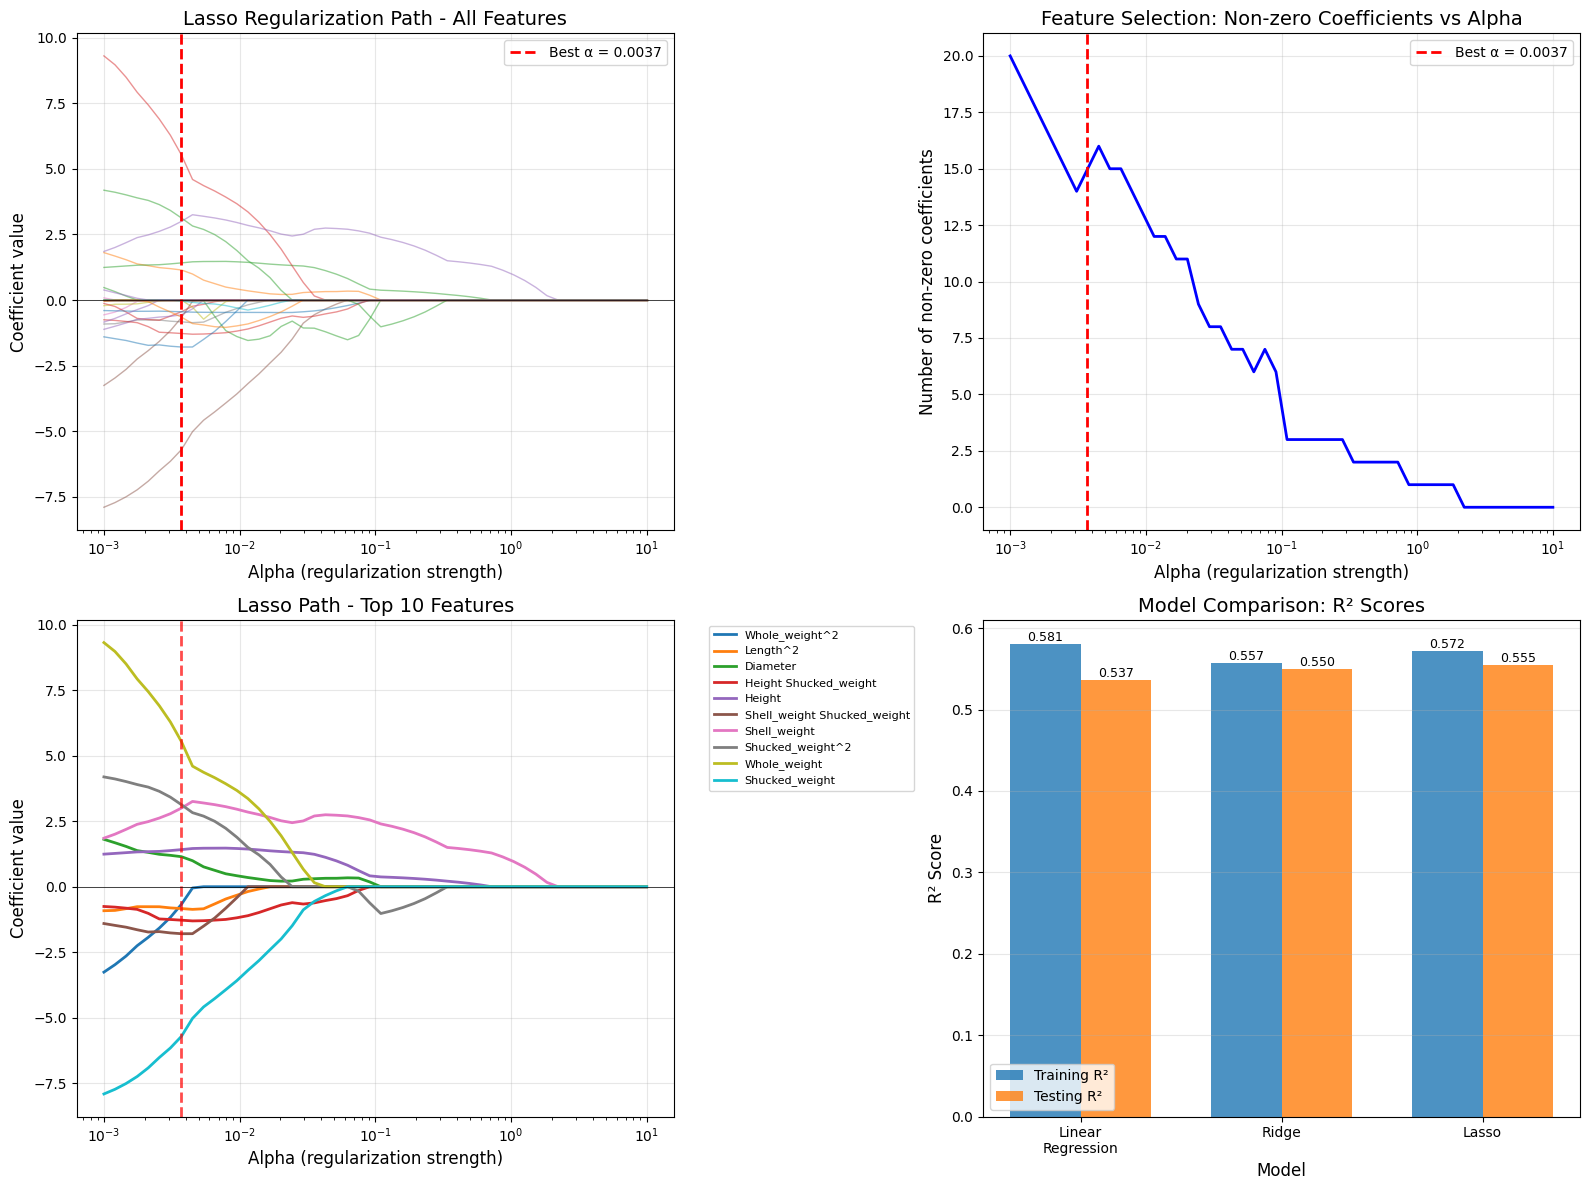

In [20]:
# Compute Lasso coefficients for different alpha values
alphas_lasso_path = np.logspace(-3, 1, 50)
coefs_lasso = []
n_features_selected = []

for alpha in alphas_lasso_path:
    lasso = Lasso(alpha=alpha, max_iter=10000, random_state=42)
    lasso.fit(X_train_poly_scaled, y_train)
    coefs_lasso.append(lasso.coef_)
    n_features_selected.append(np.sum(lasso.coef_ != 0))

coefs_lasso = np.array(coefs_lasso)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Lasso regularization path - All features
ax1 = axes[0, 0]
for i in range(coefs_lasso.shape[1]):
    ax1.plot(alphas_lasso_path, coefs_lasso[:, i], alpha=0.5, linewidth=1)
ax1.set_xscale('log')
ax1.set_xlabel('Alpha (regularization strength)', fontsize=12)
ax1.set_ylabel('Coefficient value', fontsize=12)
ax1.set_title('Lasso Regularization Path - All Features', fontsize=14)
ax1.axvline(best_alpha_lasso, color='red', linestyle='--', linewidth=2, label=f'Best α = {best_alpha_lasso:.4f}')
ax1.axhline(0, color='black', linestyle='-', linewidth=0.5)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Number of selected features vs alpha
ax2 = axes[0, 1]
ax2.plot(alphas_lasso_path, n_features_selected, linewidth=2, color='blue')
ax2.set_xscale('log')
ax2.set_xlabel('Alpha (regularization strength)', fontsize=12)
ax2.set_ylabel('Number of non-zero coefficients', fontsize=12)
ax2.set_title('Feature Selection: Non-zero Coefficients vs Alpha', fontsize=14)
ax2.axvline(best_alpha_lasso, color='red', linestyle='--', linewidth=2, label=f'Best α = {best_alpha_lasso:.4f}')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Top features by magnitude
ax3 = axes[1, 0]
top_indices_lasso = np.argsort(np.abs(lasso_coefs))[-10:]
for i in top_indices_lasso:
    if lasso_coefs[i] != 0:  # Only plot non-zero coefficients
        ax3.plot(alphas_lasso_path, coefs_lasso[:, i], label=feature_names[i], linewidth=2)
ax3.set_xscale('log')
ax3.set_xlabel('Alpha (regularization strength)', fontsize=12)
ax3.set_ylabel('Coefficient value', fontsize=12)
ax3.set_title('Lasso Path - Top 10 Features', fontsize=14)
ax3.axvline(best_alpha_lasso, color='red', linestyle='--', linewidth=2, alpha=0.7)
ax3.axhline(0, color='black', linestyle='-', linewidth=0.5)
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax3.grid(True, alpha=0.3)

# Plot 4: Comparison of models
ax4 = axes[1, 1]
models = ['Linear\nRegression', 'Ridge', 'Lasso']
train_scores = [train_r2, train_r2_ridge, train_r2_lasso]
test_scores = [test_r2, test_r2_ridge, test_r2_lasso]

x_pos = np.arange(len(models))
width = 0.35

bars1 = ax4.bar(x_pos - width/2, train_scores, width, label='Training R²', alpha=0.8)
bars2 = ax4.bar(x_pos + width/2, test_scores, width, label='Testing R²', alpha=0.8)

ax4.set_xlabel('Model', fontsize=12)
ax4.set_ylabel('R² Score', fontsize=12)
ax4.set_title('Model Comparison: R² Scores', fontsize=14)
ax4.set_xticks(x_pos)
ax4.set_xticklabels(models)
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Model Interpretation Summary

In [21]:
print("="*80)
print("COMPREHENSIVE MODEL INTERPRETATION")
print("="*80)

print("\n1. POLYNOMIAL FEATURES (Linear Regression)")
print("-" * 80)
print(f"   • Original features: {X_train.shape[1]}")
print(f"   • Polynomial features (degree=2): {X_train_poly.shape[1]}")
print(f"   • Training R²: {train_r2:.4f} | Testing R²: {test_r2:.4f}")
print(f"   • Max coefficient magnitude: {np.max(np.abs(lr_poly.coef_)):.2f}")
print(f"\n   Interpretation:")
print(f"   - Polynomial features capture non-linear relationships (e.g., Length², Length×Diameter)")
print(f"   - High training R² suggests model fits training data well")
if train_r2 - test_r2 > 0.05:
    print(f"   - Gap between training and test R² ({train_r2 - test_r2:.4f}) indicates OVERFITTING")
    print(f"   - Large coefficients ({np.max(np.abs(lr_poly.coef_)):.2f}) suggest model is unstable")
print(f"   - Model is sensitive to noise and may not generalize well")

print("\n2. RIDGE REGRESSION (L2 Regularization)")
print("-" * 80)
print(f"   • Best alpha: {best_alpha:.4f}")
print(f"   • Training R²: {train_r2_ridge:.4f} | Testing R²: {test_r2_ridge:.4f}")
print(f"   • Max coefficient magnitude: {np.max(np.abs(ridge_coefs)):.2f}")
print(f"   • Coefficient reduction: {(1 - np.max(np.abs(ridge_coefs))/np.max(np.abs(lr_poly.coef_)))*100:.1f}%")
print(f"\n   Interpretation:")
print(f"   - Ridge adds L2 penalty: Loss = MSE + α × Σ(coefficients²)")
print(f"   - Shrinks ALL coefficients toward zero (but never exactly zero)")
print(f"   - Better generalization: test R² ({test_r2_ridge:.4f}) closer to training R²")
print(f"   - Coefficient shrinkage reduces overfitting and model variance")
print(f"   - Alpha = {best_alpha:.4f} balances bias-variance tradeoff (found via CV)")
print(f"   - Ridge is preferred when all features are potentially relevant")

print("\n3. LASSO REGRESSION (L1 Regularization)")
print("-" * 80)
print(f"   • Best alpha: {best_alpha_lasso:.4f}")
print(f"   • Training R²: {train_r2_lasso:.4f} | Testing R²: {test_r2_lasso:.4f}")
print(f"   • Features selected: {n_nonzero}/{len(lasso_coefs)} ({n_nonzero/len(lasso_coefs)*100:.1f}%)")
print(f"   • Features eliminated: {n_zero}/{len(lasso_coefs)} ({n_zero/len(lasso_coefs)*100:.1f}%)")
print(f"\n   Interpretation:")
print(f"   - Lasso adds L1 penalty: Loss = MSE + α × Σ|coefficients|")
print(f"   - Drives some coefficients EXACTLY to zero → automatic feature selection")
print(f"   - Selected {n_nonzero} most important features, eliminated {n_zero} irrelevant ones")
print(f"   - Simpler, more interpretable model with fewer features")
print(f"   - Test R²: {test_r2_lasso:.4f} - good generalization with sparse model")
print(f"   - Lasso is preferred when only a subset of features is truly important")

print("\n4. KEY INSIGHTS")
print("-" * 80)
print(f"   • Biological growth (Rings) is non-linear → polynomial features help")
print(f"   • Without regularization → overfitting (large coefficients, poor generalization)")
print(f"   • Ridge: Shrinks coefficients, improves stability, keeps all features")
print(f"   • Lasso: Feature selection + regularization, creates sparse interpretable models")
if test_r2_ridge > test_r2_lasso:
    print(f"   • Ridge performs better (R²={test_r2_ridge:.4f} vs {test_r2_lasso:.4f})")
    print(f"     → Suggests most features contribute to prediction")
else:
    print(f"   • Lasso performs better (R²={test_r2_lasso:.4f} vs {test_r2_ridge:.4f})")
    print(f"     → Suggests only subset of features are truly important")
print(f"\n   • Scaling is CRUCIAL for regularization (penalties are scale-sensitive)")
print(f"   • Cross-validation finds optimal α automatically")

print("\n" + "="*80)

COMPREHENSIVE MODEL INTERPRETATION

1. POLYNOMIAL FEATURES (Linear Regression)
--------------------------------------------------------------------------------
   • Original features: 7
   • Polynomial features (degree=2): 35
   • Training R²: 0.5810 | Testing R²: 0.5367
   • Max coefficient magnitude: 150.56

   Interpretation:
   - Polynomial features capture non-linear relationships (e.g., Length², Length×Diameter)
   - High training R² suggests model fits training data well
   - Model is sensitive to noise and may not generalize well

2. RIDGE REGRESSION (L2 Regularization)
--------------------------------------------------------------------------------
   • Best alpha: 28.4804
   • Training R²: 0.5574 | Testing R²: 0.5498
   • Max coefficient magnitude: 2.28
   • Coefficient reduction: 98.5%

   Interpretation:
   - Ridge adds L2 penalty: Loss = MSE + α × Σ(coefficients²)
   - Shrinks ALL coefficients toward zero (but never exactly zero)
   - Better generalization: test R² (0.5498